In [4]:
import sys
sys.path.insert(0,'../src')
sys.path.insert(0,'../data')
sys.path.insert(0,'../upload_data')
sys.path.insert(0,'../config')
sys.path.insert(0,'..')
import geopandas as gpd
import pandas as pd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import etl
import json
import cleaning
import datetime

In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
%reload_ext autoreload

In [7]:
census_fp = '../upload_data/sd_population.csv'
census =  pd.read_csv(census_fp)
areas = gpd.read_file('http://seshat.datasd.org/sde/pd/pd_beats_datasd.zip')

In [8]:
areas = areas.drop(['objectid', 'name'],axis = 1)
areas

,beat,div,serv,geometry
0,935,9,930,"MULTIPOLYGON (((6268975.465 1931147.469, 62689..."
1,0,0,0,"MULTIPOLYGON (((6261648.576 1836846.672, 62616..."
2,511,5,510,"MULTIPOLYGON (((6261640.429 1836823.561, 62616..."
3,722,7,720,"POLYGON ((6302781.000 1793246.001, 6302905.000..."
4,314,3,310,"POLYGON ((6284667.652 1874418.895, 6284694.392..."
...,...,...,...,...
135,243,2,240,"POLYGON ((6295777.084 1908435.558, 6295790.126..."
136,937,9,930,"POLYGON ((6295209.132 1952772.422, 6295208.647..."
137,936,9,930,"POLYGON ((6287497.113 1936631.116, 6287462.453..."
138,233,2,230,"POLYGON ((6306176.245 1943421.146, 6306158.416..."


In [9]:
def div_op(row, race):
    try:
        return row['count']/row[race]
    except:
        return 0
    
def make_proportion(df,race,start_date,end_date):
    sub1 = census[['beat','serv',race]]
    sub2 = make_counts(df,race,start_date,end_date)
    combin = census.merge(sub2, left_on='beat',right_index = True, how = 'outer')
    combin['prop'] = combin.apply(lambda x: div_op(x, race),axis=1)
    return combin[['beat','serv',race,'count', 'prop']]

def make_merged():
    census_fp = '../upload_data/sd_population.csv'
    census =  pd.read_csv(census_fp)
    areas = gpd.read_file('http://seshat.datasd.org/sde/pd/pd_beats_datasd.zip')
    areas = areas.drop(['objectid', 'name'],axis = 1)
    for race in ['White','Asian', 'Black','Hispanic/Latino/a']:
        heat = areas.merge(make_prop(race), on=['beat'],how = 'outer')
    heat = heat.dropna()
    return heat

def make_counts(df,race,start_date,end_date):
    df = df[df.subject_race == race]
    df['date_stop'] = pd.to_datetime(df.date_stop)
    df = df[(df['date_stop'] >= start_date) & (df['date_stop'] <= end_date)].groupby('beat').agg('count')
    return pd.DataFrame(df.stop_id).rename(columns={'stop_id':'count'})

In [10]:
pappp = '../data/raw/STOPS_2018-2019.csv'
test = cleaning.clean_2018_2019(pappp)
test

,stop_id,stop_cause,beat,service_area,subject_race,subject_sex,subject_age,date_stop,time_stop,arrested,searched,obtained_consent,contraband_found,property_seized
0,2443,Reasonable Suspicion,122,120,White,Male,25,2018-07-01,00:01:37,Y,N,NaN,N,N
1,2444,Traffic Violation,121,120,White,Male,25,2018-07-01,00:03:34,N,N,NaN,N,N
2,2447,Reasonable Suspicion,822,820,Hispanic/Latino/a,Male,30,2018-07-01,00:05:43,N,N,NaN,N,N
3,2448,Traffic Violation,614,610,White,Male,23,2018-07-01,00:19:06,N,N,NaN,N,N
4,2449,Reasonable Suspicion,115,110,White,Male,25,2018-07-01,00:03:00,Y,Y,NaN,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241285,255143,Traffic Violation,511,510,Hispanic/Latino/a,Male,19,2019-12-31,11:57:00,N,N,NaN,N,N
241286,255256,Traffic Violation,523,520,Middle Eastern or South Asian,Male,58,2019-12-31,22:42:00,N,N,NaN,N,N
241287,255267,Reasonable Suspicion,523,520,Asian,Male,35,2019-12-31,23:59:37,Y,N,NaN,N,N
241288,255272,Reasonable Suspicion,523,520,Asian,Male,40,2019-12-31,22:20:32,Y,N,NaN,N,N


In [11]:
dfd = make_proportion(test,'Asian','2018-07-01','2018-10-15')
dfd

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,beat,serv,Asian,count,prop
0,111,110,3882,31.0,0.007986
1,112,110,680,7.0,0.010294
2,113,110,660,13.0,0.019697
3,114,110,1580,26.0,0.016456
4,115,110,15554,94.0,0.006043
...,...,...,...,...,...
120,933,930,525,20.0,0.038095
121,934,930,10994,97.0,0.008823
122,935,930,1038,6.0,0.005780
123,936,930,1268,2.0,0.001577


In [12]:
ggg = areas.merge(dfd, on=['beat','serv'],how = 'outer').dropna()
ggg

,beat,div,serv,geometry,Asian,count,prop
0,935,9,930,"MULTIPOLYGON (((6268975.465 1931147.469, 62689...",1038.0,6.0,0.005780
2,511,5,510,"MULTIPOLYGON (((6261640.429 1836823.561, 62616...",907.0,9.0,0.009923
3,511,5,510,"POLYGON ((6283949.000 1837581.000, 6284299.000...",907.0,9.0,0.009923
4,722,7,720,"POLYGON ((6302781.000 1793246.001, 6302905.000...",2150.0,12.0,0.005581
5,314,3,310,"POLYGON ((6284667.652 1874418.895, 6284694.392...",663.0,4.0,0.006033
...,...,...,...,...,...,...,...
133,312,3,310,"POLYGON ((6329983.163 1898909.760, 6329939.123...",2849.0,7.0,0.002457
135,243,2,240,"POLYGON ((6295777.084 1908435.558, 6295790.126...",245.0,19.0,0.077551
136,937,9,930,"POLYGON ((6295209.132 1952772.422, 6295208.647...",1231.0,15.0,0.012185
137,936,9,930,"POLYGON ((6287497.113 1936631.116, 6287462.453...",1268.0,2.0,0.001577


In [13]:
changed = ggg.dissolve(by = 'serv',aggfunc = 'sum')
changed

,geometry,beat,div,Asian,count,prop
serv,,,,,,
110,"POLYGON ((6279253.112 1884255.837, 6279262.023...",681,6,23245.0,200.0,0.093097
120,"POLYGON ((6252987.541 1857451.641, 6252282.413...",859,7,4498.0,277.0,5.536282
230,"POLYGON ((6305786.455 1931764.390, 6305786.467...",930,8,27024.0,86.0,0.014918
240,"POLYGON ((6291971.520 1887674.568, 6291757.788...",1217,10,40406.0,201.0,0.090706
310,"POLYGON ((6296145.895 1867575.086, 6296105.935...",1881,18,8375.0,284.0,0.420421
320,"POLYGON ((6316141.200 1862937.460, 6316142.727...",2268,21,5491.0,44.0,0.053780
430,"POLYGON ((6317292.625 1824640.012, 6317192.369...",4819,44,31597.0,114.0,0.089890
440,"POLYGON ((6299388.999 1831529.000, 6299388.000...",3108,28,3568.0,52.0,0.118839
510,"MULTIPOLYGON (((6266866.000 1831771.472, 62668...",4114,40,2607.0,43.0,0.280963


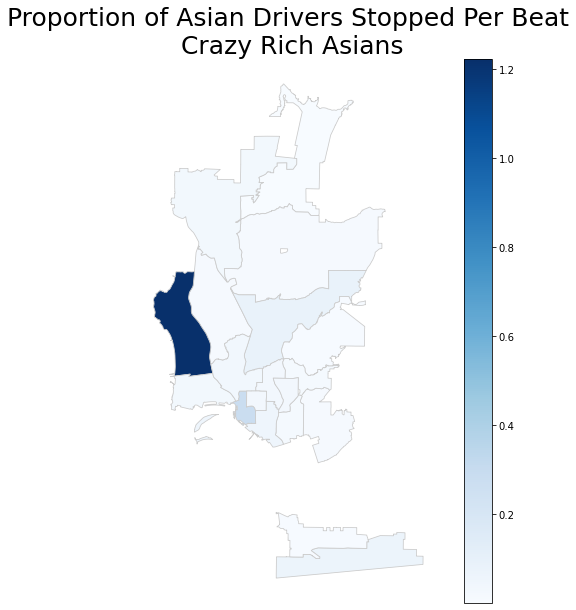

In [14]:
variable = 'Asian'
vmin, vmax = 0, 40000
fig, ax = plt.subplots(1, figsize=(10,10))
ax.axis('off')
ax.set_title('Proportion of Asian Drivers Stopped Per Beat\n Crazy Rich Asians', fontdict={'fontsize':'25','fontweight' : '3'})
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=ggg.prop.min(), vmax=ggg.prop.max()))
fig.colorbar(sm)
changed.plot(column='prop', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

In [21]:
viz.population_heat(test, 'Asian')

[autoreload of viz failed: Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/opt/anaconda3/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/opt/anaconda3/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 724, in exec_module
  File "<frozen importlib._bootstrap_external>", line 860, in get_code
  File "<frozen importlib._bootstrap_external>", line 791, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "../src/viz.py", line 50
    changed.plot(column='prop', cmap='B

AttributeError: module 'math' has no attribute 'round'

In [17]:
import viz

In [ ]:
def event_heat(event, race, table):
    areas = make_areas()
    final = census.merge
    fig, ax = plt.subplots(1, figsize=(10,10))
    ax.axis('off')
    ax.set_title(f'Proportion of {} Drivers Stopped Per Beat\n {}'.format(race, event), fontdict={'fontsize':'25','fontweight' : '3'})
    sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=table.prop.min(), vmax=table.prop.max()))
    fig.colorbar(sm)
    final.plot(column='prop', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')


In [269]:
def make_areas():
    areas = gpd.read_file('http://seshat.datasd.org/sde/pd/pd_beats_datasd.zip')
    areas = areas.drop(['objectid', 'name', 'beat', 'div'],axis = 1)
    return areas.dissolve(by = 'serv',aggfunc = 'first')

In [101]:
areas = make_areas()
areas

,serv,geometry
0,930,"MULTIPOLYGON (((6268975.465 1931147.469, 62689..."
1,0,"MULTIPOLYGON (((6261648.576 1836846.672, 62616..."
2,510,"MULTIPOLYGON (((6261640.429 1836823.561, 62616..."
3,720,"POLYGON ((6302781.000 1793246.001, 6302905.000..."
4,310,"POLYGON ((6284667.652 1874418.895, 6284694.392..."
...,...,...
135,240,"POLYGON ((6295777.084 1908435.558, 6295790.126..."
136,930,"POLYGON ((6295209.132 1952772.422, 6295208.647..."
137,930,"POLYGON ((6287497.113 1936631.116, 6287462.453..."
138,230,"POLYGON ((6306176.245 1943421.146, 6306158.416..."


In [54]:
census.head()

,YEAR,beat,serv,Total,White,Hispanic/Latino/a,Black,N,Asian,U & P,O,Two or More Races
0,2010,111,110,25358,15779,5866,1346,166,3882,147,2379,1659
1,2010,112,110,9785,8018,1247,162,67,680,32,382,444
2,2010,113,110,11966,9442,2340,160,81,660,36,977,610
3,2010,114,110,14870,10251,3715,259,115,1580,66,1773,826
4,2010,115,110,49029,28823,4690,790,90,15554,86,1582,2104


In [115]:
def make_counts(df,race,start_date,end_date):
    df = df[df.subject_race == race]
    df['date_stop'] = pd.to_datetime(df.date_stop)
    df = df[(df['date_stop'] >= start_date) & (df['date_stop'] <= end_date)]
    df = df.groupby('service_area').agg('count')
    return pd.DataFrame(df.stop_id).rename(columns={'stop_id':'counts'})

In [116]:
make_counts(test,'Asian','2018-07-01','2018-10-15')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,counts
service_area,
110,200
120,244
230,86
240,201
310,284
320,44
430,108
440,52
510,34


In [203]:
table = pd.pivot_table(census,index = 'serv', values = ['Asian', 'Total'], aggfunc = sum)
table = table.div(table.iloc[:,-1],axis = 0).drop('Total', axis = 1)
table

,Asian
serv,
110,0.182574
120,0.088061
230,0.245780
240,0.371843
310,0.125062
320,0.073711
430,0.263398
440,0.070286
510,0.029220


In [184]:
test_asian = test[(test['date_stop'] >= '2018-07-01') & (test['date_stop'] <= '2018-10-15')]
test_asian = pd.pivot_table(test_asian, index = 'service_area', columns = 'subject_race', values = 'stop_id', aggfunc = 'count',fill_value=0)
test_asian['Total'] = test_asian.apply(sum, axis = 1)
test_asian = test_asian.div(test_asian.iloc[:,-1],axis = 0)
test_asian.index = test_asian.index.astype('int64')

In [193]:
prop_table = pd.merge(table, test_asian['Asian'], left_index=True, right_index=True,how='outer')

In [182]:
test_asian.index

Index(['110', '120', '230', '240', '310', '320', '430', '440', '510', '520',
       '530', '610', '620', '710', '720', '810', '820', '830', '930'],
      dtype='object', name='service_area')

In [160]:
test_asian['Asian'].index

Index(['110', '120', '230', '240', '310', '320', '430', '440', '510', '520',
       '530', '610', '620', '710', '720', '810', '820', '830', '930'],
      dtype='object', name='service_area')

In [207]:
race = 'black'
f'hello {race}'.format(race)

'hello black'

In [223]:
#keep
def make_denominator(census, race):
    table = pd.pivot_table(census,index = 'serv', values = [race, 'Total'], aggfunc = sum)
    table = table.div(table.iloc[:,-1],axis = 0).drop('Total', axis = 1)
    table = table.rename(columns={race:'denominator'})
    return table

In [224]:
#keep
def make_numerator(df,race,start_date,end_date):
    numer = test[(test['date_stop'] >= '2018-07-01') & (test['date_stop'] <= '2018-10-15')]
    numer = pd.pivot_table(numer, index = 'service_area', columns = 'subject_race', values = 'stop_id', aggfunc = 'count',fill_value=0)
    numer['Total'] = numer.apply(sum, axis = 1)
    numer = numer.div(numer.iloc[:,-1],axis = 0)
    numer.index = numer.index.astype('int64')
    numer = pd.DataFrame(numer[race])
    return numer.rename(columns={race:'numerator'})

In [226]:
numers = make_numerator(test,'Asian','2018-07-01','2018-10-15')
denoms = make_denominator(census,'Asian')

In [240]:
def make_proportions(df,race,start_date,end_date):
    census_fp = '../upload_data/sd_population.csv'
    census =  pd.read_csv(census_fp)
    numerators = make_numerator(df,race,start_date,end_date)
    denominators = make_denominator(census, race)
    merger = numers.merge(denoms, left_index=True,right_index=True)
    return pd.DataFrame(merger.numerator/merger.denominator, columns=['prop'])

service_area


In [307]:
test2

,stop_id,stop_cause,service_area,subject_race,subject_sex,subject_age,date_stop,time_stop,arrested,searched,obtained_consent,contraband_found,property_seized
0,1444799,Moving Violation,120,Native American,Male,37.0,2017-01-01,00:03:00,N,N,NaN,N,N
1,1444821,Equipment Violation,520,White,Male,22.0,2017-01-01,00:25:00,N,N,NaN,N,N
2,1447102,Moving Violation,520,White,Male,29.0,2017-01-01,01:45:00,N,N,NaN,N,N
3,1444801,Equipment Violation,720,Hispanic/Latino/a,Female,61.0,2017-01-01,03:10:00,N,N,NaN,N,N
4,1444802,Equipment Violation,120,Hispanic/Latino/a,Male,24.0,2017-01-01,03:30:00,N,N,NaN,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103357,1620175,Moving Violation,110,White,Male,39.0,2018-06-25,10:47:00,N,N,NaN,N,N
103358,1620177,Moving Violation,110,White,Female,32.0,2018-06-25,11:34:00,N,N,NaN,N,N
103359,1620178,Moving Violation,110,White,Female,21.0,2018-06-25,11:56:00,N,N,NaN,N,N
103360,1620179,Moving Violation,110,White,Male,43.0,2018-06-25,12:45:00,N,N,NaN,N,N


In [242]:
make_proportions(test,'Asian','2018-07-01','2018-10-15')

,prop
service_area,
110,0.389007
120,0.408492
230,0.311028
240,0.435225
310,0.734200
320,0.577301
430,0.288547
440,0.438810
510,0.318795


In [271]:
areas = gpd.read_file('http://seshat.datasd.org/sde/pd/pd_beats_datasd.zip')
areas = areas.drop(['objectid', 'name', 'beat', 'div'],axis = 1)

In [272]:
areas

,serv,geometry
0,930,"MULTIPOLYGON (((6268975.465 1931147.469, 62689..."
1,0,"MULTIPOLYGON (((6261648.576 1836846.672, 62616..."
2,510,"MULTIPOLYGON (((6261640.429 1836823.561, 62616..."
3,720,"POLYGON ((6302781.000 1793246.001, 6302905.000..."
4,310,"POLYGON ((6284667.652 1874418.895, 6284694.392..."
...,...,...
135,240,"POLYGON ((6295777.084 1908435.558, 6295790.126..."
136,930,"POLYGON ((6295209.132 1952772.422, 6295208.647..."
137,930,"POLYGON ((6287497.113 1936631.116, 6287462.453..."
138,230,"POLYGON ((6306176.245 1943421.146, 6306158.416..."


In [275]:
r = areas.merge(make_proportions(test,'Asian','2018-07-01','2018-10-15'), left_on='serv',right_index=True, how='outer')

In [286]:
heat = r.dissolve(by='serv',aggfunc='first').fillna(0)
heat.drop(0)

,geometry,prop
serv,,
110,"POLYGON ((6279253.112 1884255.837, 6279262.023...",0.389007
120,"POLYGON ((6252987.541 1857451.641, 6252282.413...",0.408492
230,"POLYGON ((6305786.455 1931764.390, 6305786.467...",0.311028
240,"POLYGON ((6291971.520 1887674.568, 6291757.788...",0.435225
310,"POLYGON ((6296145.895 1867575.086, 6296105.935...",0.734200
320,"POLYGON ((6316141.200 1862937.460, 6316142.727...",0.577301
430,"POLYGON ((6317292.625 1824640.012, 6317192.369...",0.288547
440,"POLYGON ((6299388.999 1831529.000, 6299388.000...",0.438810
510,"MULTIPOLYGON (((6266866.000 1831771.472, 62668...",0.318795


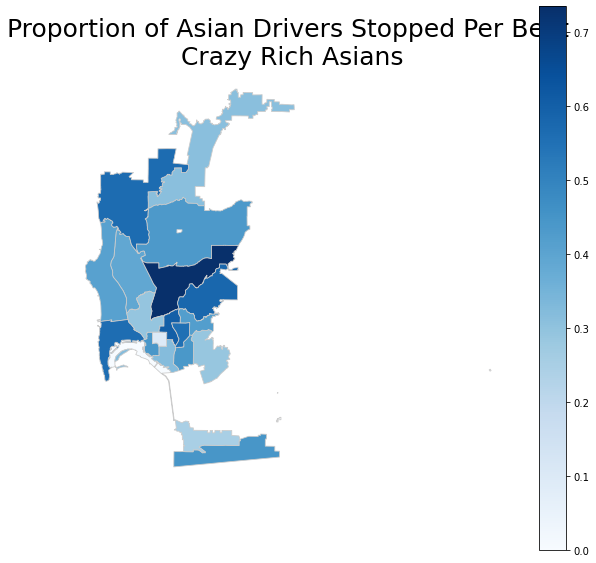

In [284]:
variable = 'Asian'
fig, ax = plt.subplots(1, figsize=(10,10))
ax.axis('off')
ax.set_title('Proportion of Asian Drivers Stopped Per Beat\n Crazy Rich Asians', fontdict={'fontsize':'25','fontweight' : '3'})
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=heat.prop.min(), vmax=heat.prop.max()))
fig.colorbar(sm)
heat.plot(column='prop', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

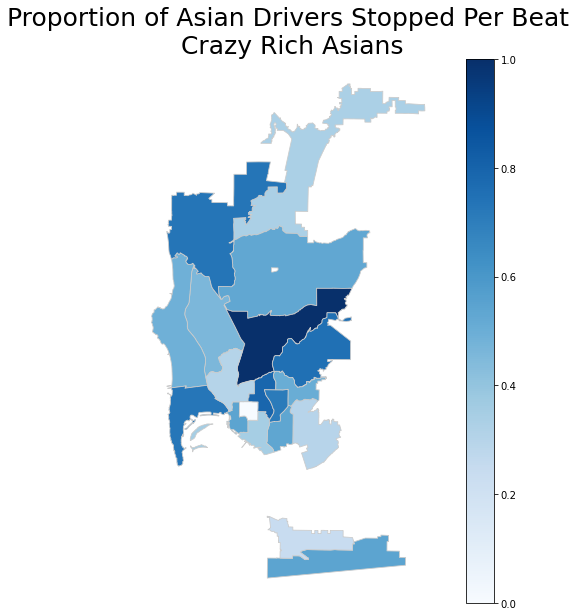

In [288]:
variable = 'Asian'
fig, ax = plt.subplots(1, figsize=(10,10))
ax.axis('off')
ax.set_title('Proportion of Asian Drivers Stopped Per Beat\n Crazy Rich Asians', fontdict={'fontsize':'25','fontweight' : '3'})
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=1))
fig.colorbar(sm)
heat.drop(0).plot(column='prop', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

In [294]:
def make_heat(df,race,event,start_date,end_date):
    areas = make_areas()
    props = make_proportions(df,race,start_date,end_date)
    heat = areas.merge(props, left_on='serv',right_index=True, how='outer')
    heat = heat.dissolve(by='serv',aggfunc='first').fillna(0).drop(0)
    fig, ax = plt.subplots(1, figsize=(10,10))
    ax.axis('off')
    ax.set_title(f'Proportion of {race} Drivers Stopped By Service Area\n {event}'.format(race,event), fontdict={'fontsize':'25','fontweight' : '3'})
    sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=heat.prop.max()))
    fig.colorbar(sm)
    heat.plot(column='prop', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

In [291]:
import heatmaps

TypeError: cannot unpack non-iterable Polygon object

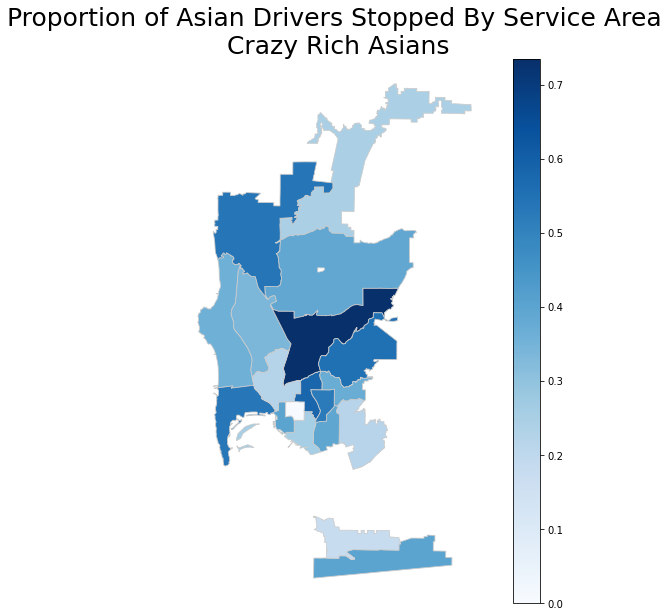

In [300]:
heatmaps.make_heat(test,'Asian','Crazy Rich Asians','2018-07-01','2018-10-15')

In [301]:
pappp = '../data/raw/STOPS_2017.csv'
test2 = cleaning.clean_2014_2017(pappp)

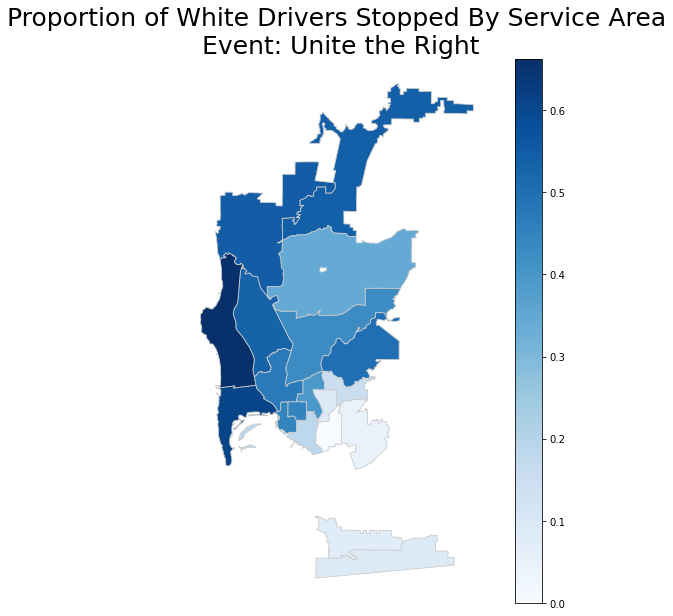

In [318]:
heatmaps.make_heat(test2,'White','Unite the Right','2017-06-12','2017-10-12')